In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as skpe
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import sklearn.ensemble as ensemble
import xgboost as xgb
import lightgbm as lgb
import scipy.stats as stats
import sklearn.kernel_ridge as ridge
import numpy.random as nr
import sklearn.linear_model as lm

In [3]:
path = "../input/house-prices-advanced-regression-techniques/train.csv"
train = pd.read_csv(path)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
path1 = "../input/house-prices-advanced-regression-techniques/test.csv"
test = pd.read_csv(path1)
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.info()
print("-------------------------------------")

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [8]:
# Let's look at the target variable first
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

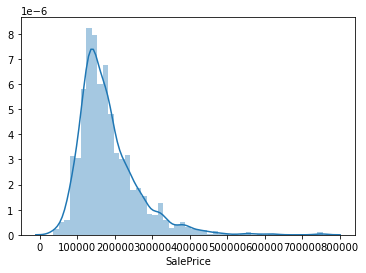

In [9]:
# This looks slightly right-skewed
sns.distplot(train['SalePrice'])

In [10]:
# Skewness and Kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


**There are some features which tend to be a major factor in predicting sale price like LotArea, GrLivArea, Bsmt area(TotalBsmtSF) and OverallQual. So, we will look at their relationship with the target variable.**

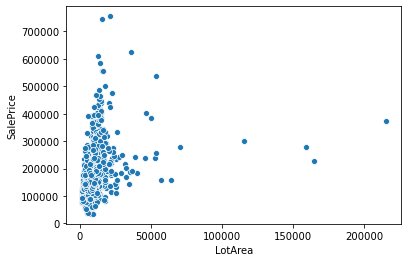

In [11]:
sns.scatterplot(y='SalePrice',x='LotArea',data=train)

**This is looking constant to SalePrice.**

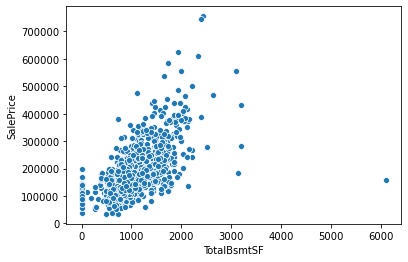

In [12]:
sns.scatterplot(y='SalePrice',x='TotalBsmtSF',data=train)

**Bsmt area shares an exponential relationship with SalePrice.**

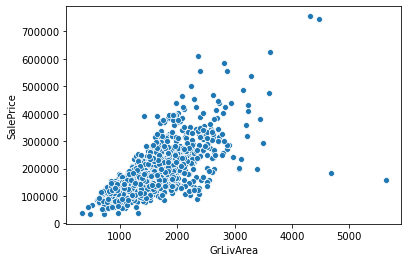

In [13]:
sns.scatterplot(y='SalePrice',x='GrLivArea',data=train)

**As expected living area above ground is almost linearly varying with SalePrice.**

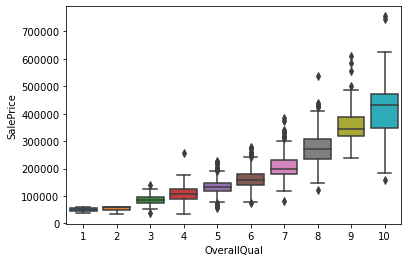

In [14]:
sns.boxplot(y=train['SalePrice'],x=train['OverallQual'])

**It looks like OverallQual shares a very distinctive relationship with SalePrice with multiple variations.**

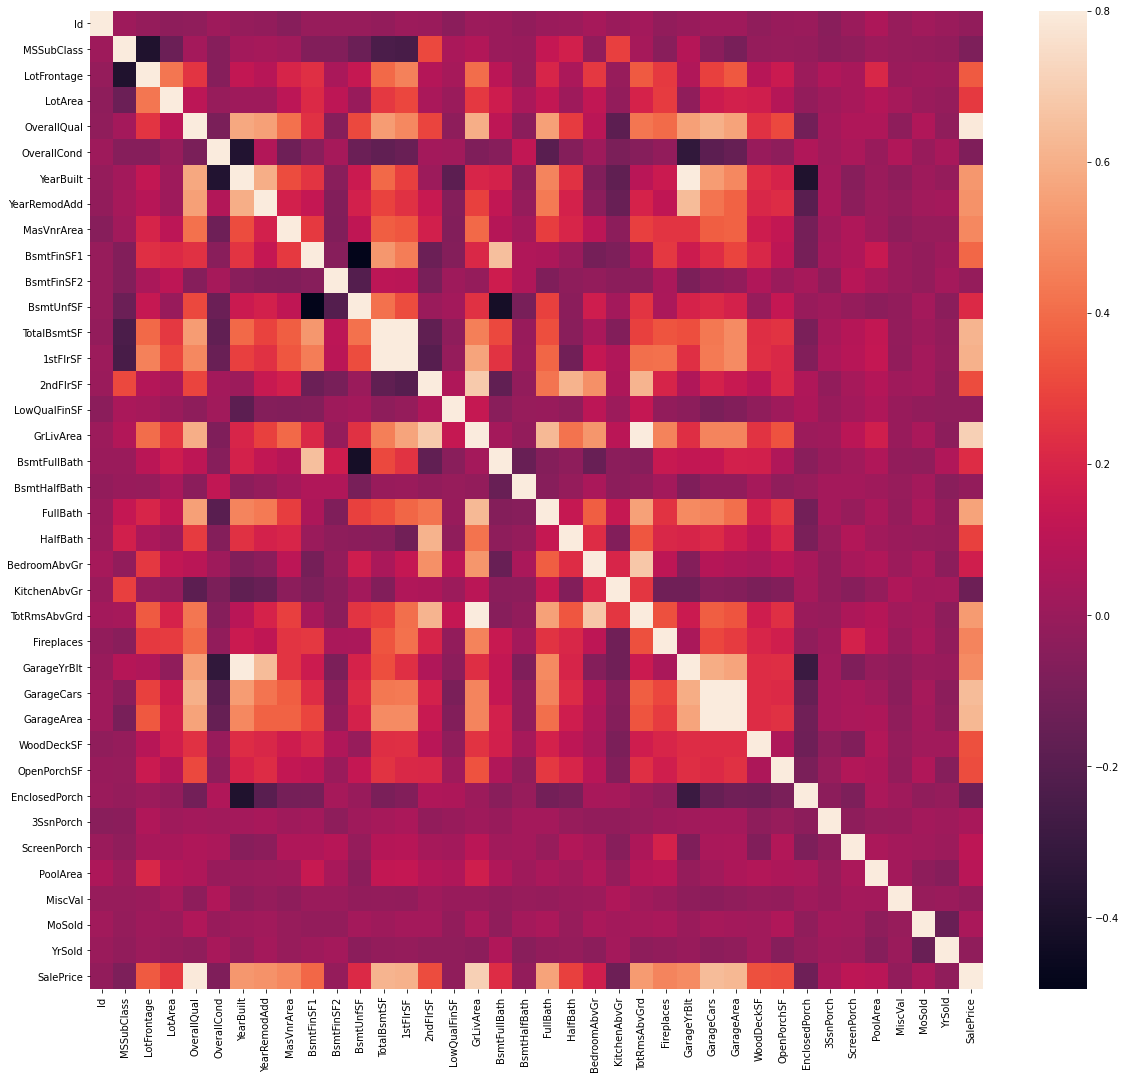

In [15]:
# HeatMap
fig, ax = plt.subplots(figsize=(20, 18))
sns.heatmap(train.corr(), vmax=.8)

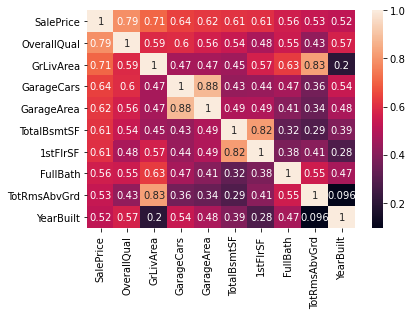

In [16]:
k = 10 #number of variables for heatmap
cols = train.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

**Let's see some top features having highest correlation coeffecient with the target variable.**

In [17]:
corr = train.corr()

# Sort in descending order
corr_top = corr['SalePrice'].sort_values(ascending=False)[:10]
top_features = corr_top.index[1:]
print(corr_top)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


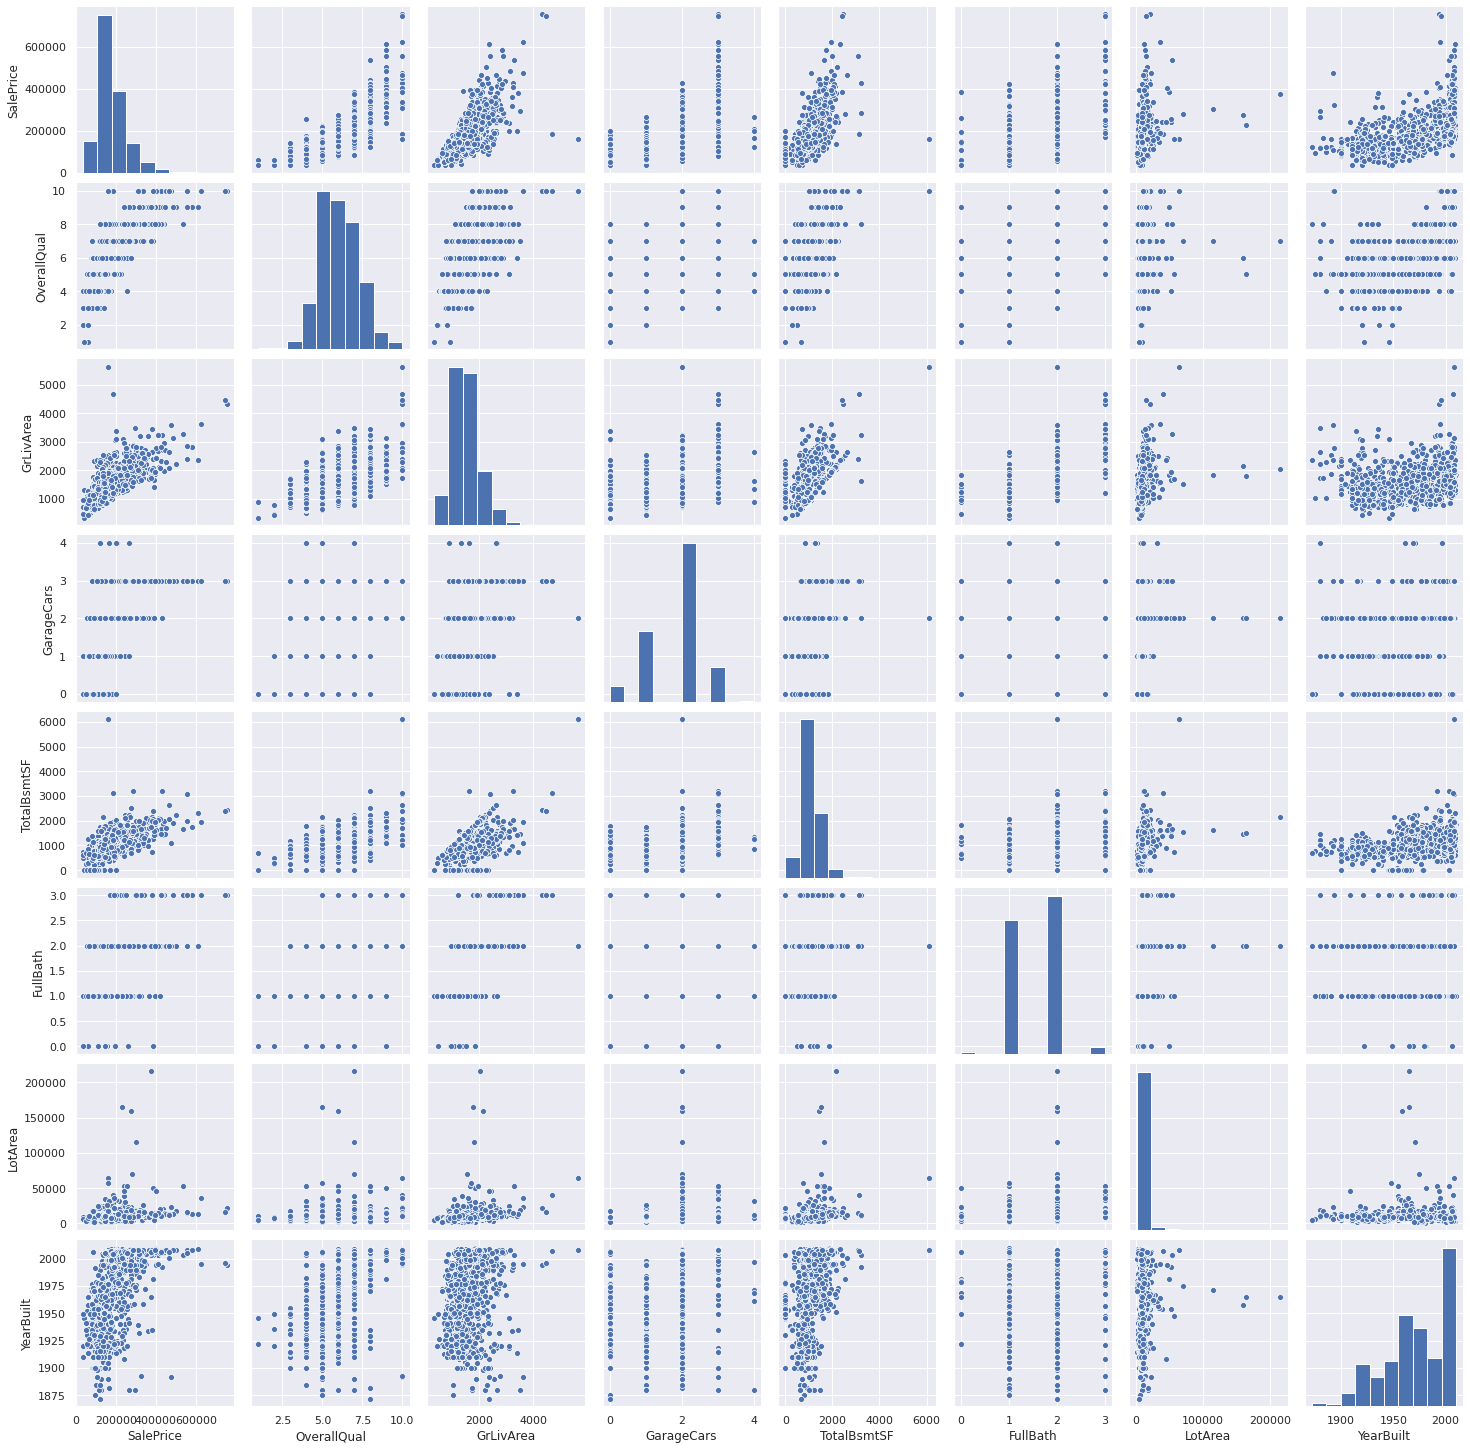

In [18]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'LotArea','YearBuilt']
sns.pairplot(train[cols], size = 2.5)

# Outliers

In [19]:
Q1 = []
Q3 = []
Lower_Bound = []
Upper_Bound = []
Outliers = []

for i in top_features:
    
    # 25th and 75th percentiles
    q1, q3 = np.percentile(train[i], 25), np.percentile(train[i], 75)
    
    # Interquartile range
    iqr = q3 - q1
    
    # Outlier cutoff
    cut_off = 1.5*iqr
    
    # Lower and upper bounds
    lower_bound = q1 - cut_off
    upper_bound = q3 + cut_off
    
    # Save outlier indexes
    outlier = [x for x in train.index if train.loc[x,i] < lower_bound or train.loc[x,i] > upper_bound]
    
    # Append values for dataframe
    Q1.append(q1)
    Q3.append(q3)
    Lower_Bound.append(lower_bound)
    Upper_Bound.append(upper_bound)
    Outliers.append(len(outlier))
    
    try:
        train.drop(outlier, inplace=True, axis=0)
        
    except:
        continue
        
df_out = pd.DataFrame({'column':top_features,'Q1':Q1,'Q3':Q3,'Lower_Bound':Lower_Bound,'Upper_Bound':Upper_Bound,'No. of Outliers':Outliers})
df_out.sort_values(by='No. of Outliers', ascending=False)

,column,Q1,Q3,Lower_Bound,Upper_Bound,No. of Outliers
4,TotalBsmtSF,792.75,1266.25,82.500,1976.500,58
1,GrLivArea,1131.00,1778.25,160.125,2749.125,31
3,GarageArea,325.25,576.00,-50.875,952.125,14
7,TotRmsAbvGrd,5.00,7.00,2.000,10.000,11
5,1stFlrSF,866.00,1343.50,149.750,2059.750,7
2,GarageCars,1.00,2.00,-0.500,3.500,5
8,YearBuilt,1954.00,2000.00,1885.000,2069.000,5
0,OverallQual,5.00,7.00,2.000,10.000,2
6,FullBath,1.00,2.00,-0.500,3.500,0


In [20]:
train.shape

(1327, 81)

# Feature Transformation

In [21]:
# Saving train rows
ntrain = train.shape[0]

# Save log transformation of target variable to deal with the skewness
target = np.log(train['SalePrice'])

# Drop Id and SalePrice from train dataframe
train.drop(['Id', 'SalePrice'], inplace=True, axis=1)

# Store test Id
test_Id = test['Id']

# Drop test Id
test.drop(['Id'], inplace=True, axis=1)

# Concatenate train and test dataframes
train = pd.concat([train, test])

# Handling Missing Data

In [22]:
train.isnull().sum().sort_values(ascending=False).head(40)

PoolQC          2780
MiscFeature     2688
Alley           2595
Fence           2234
FireplaceQu     1375
LotFrontage      464
GarageCond       147
GarageQual       147
GarageYrBlt      147
GarageFinish     147
GarageType       145
BsmtCond          45
BsmtExposure      45
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        22
MasVnrArea        21
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior1st        1
SaleType           1
Electrical         1
KitchenQual        1
GarageArea         1
GarageCars         1
OverallQual        0
OverallCond        0
LotArea            0
Street             0
LotShape           0
LandContour        0
dtype: int64

In [23]:
# Ordinal Features

# NA means no pool
train['PoolQC'].replace(['Ex', 'Gd', 'Fa', np.nan],[3,2,1,0], inplace=True)

# NA means no fence
train['Fence'].replace(['GdPrv', 'MnPrv', 'GdWo', 'MnWw', np.nan],[4,3,2,1,0], inplace=True)

# NA means no fireplace
train['FireplaceQu'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', np.nan],[5,4,3,2,1,0], inplace=True)

# Garage Features
train['GarageCond'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', np.nan],[5,4,3,2,1,0], inplace=True)

train['GarageQual'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', np.nan],[5,4,3,2,1,0], inplace=True)

train['GarageFinish'].replace(['RFn', 'Fin', 'Unf', np.nan],[3,2,1,0], inplace=True)

# Bsmt Features
for i in ['BsmtCond', 'BsmtQual']:
    train[i].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', np.nan],[5,4,3,2,1,0], inplace=True)

train['BsmtExposure'].replace(['Gd', 'Av', 'Mn', 'No', np.nan],[4,3,2,1,0], inplace=True)

for i in ['BsmtFinType1', 'BsmtFinType2']:
    train[i].replace(['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', np.nan],[6,5,4,3,2,1,0], inplace=True)


# Nominal Features

# NA means no alley
train['Alley'].fillna('None', inplace=True)

# NA means no miscellaneous features
train['MiscFeature'].fillna('None', inplace=True)

# NA means no garage type
train['GarageType'].fillna('None', inplace=True)

# NA means no masonry work
train['MasVnrType'].fillna('None', inplace=True)

# If no work, then no area
train['MasVnrArea'].fillna(0, inplace=True)


# Numerical Features

# Replace null lotfrontage with average of the neighbourhood
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Filling 0 with null values in BsmtFeatures
for i in ['BsmtHalfBath', 'BsmtFullBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']:
    train[i].fillna(0, inplace=True)
    
# Replace with most common values
for i in ['MSZoning', 'Utilities', 'KitchenQual']:
    train[i].fillna(train[i].mode()[0], inplace=True)
    
train['Functional'].fillna('Typ', inplace=True)

train['SaleType'].fillna('Oth' ,inplace=True)

# Replace with most common value
train['Electrical'].fillna(train['Electrical'].mode()[0] ,inplace=True)

train['GarageCars'].fillna(train['GarageCars'].mode()[0] ,inplace=True)

train['GarageYrBlt'].fillna(train['GarageYrBlt'].mode()[0] ,inplace=True)

# Repace with 'Other' value
for i in ['Exterior1st', 'Exterior2nd']:
    train[i].fillna('Other', inplace=True)
    
train['KitchenQual'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'],[4,3,2,1,0], inplace=True)

train['GarageArea'].fillna(train['GarageArea'].astype('float').mean(axis=0), inplace=True)


# Feature Engineering

In [24]:
# Total surface area of house
train['TotalSF'] = train.apply(lambda x: x['1stFlrSF'] + x['2ndFlrSF'] + x['TotalBsmtSF'], axis=1)

# Total bathrooms in the house
train['TotalBath'] = train.apply(lambda x: x['FullBath'] + 0.5*x['HalfBath'] + x['BsmtFullBath'] + 0.5*x['BsmtHalfBath'], axis=1)

# Total porch area of house
train['TotalPorch'] = train.apply(lambda x: x['OpenPorchSF'] + x['EnclosedPorch'] + x['3SsnPorch'] + x['ScreenPorch'], axis=1)

In [25]:
# Dummifying the dataset for modelling
train =pd.get_dummies(train, drop_first=True)
train.shape

(2786, 219)

# Modelling

In [26]:
# Train dataset
df = train.iloc[:ntrain,:]

# Test dataset
test = train.iloc[ntrain:,:]

# Seperating independent and dependent variables
X = df
y = target

In [27]:
# train,test split to get training,validation and testing
X_train,X_test,y_train,y_test = ms.train_test_split(X,y,random_state=2,test_size=0.2)

* Linear Regression

In [28]:
lr = lm.LinearRegression()
lr.fit(X_train,y_train)

rmse = np.sqrt(sklm.mean_squared_error(y_test,lr.predict(X_test)))
print(rmse)

0.11835293939313712


* KernelRidge

In [29]:
# Different alpha values
alphas = [0.01,0.1,0.3,1,3,5,10,20]

for a in alphas:
    kernel_ridge = ridge.KernelRidge(alpha=a)
    kernel_ridge.fit(X_train,y_train)
    
    rmse = np.sqrt(sklm.mean_squared_error(y_test,kernel_ridge.predict(X_test)))
    print('For alpha =',a,',','RMSE = ',rmse)

For alpha = 0.01 , RMSE =  0.11839344390133756
For alpha = 0.1 , RMSE =  0.11696293602741882
For alpha = 0.3 , RMSE =  0.11702253215064137
For alpha = 1 , RMSE =  0.11862269673443258
For alpha = 3 , RMSE =  0.12021471210841946
For alpha = 5 , RMSE =  0.12053657427019657
For alpha = 10 , RMSE =  0.12053529428336789
For alpha = 20 , RMSE =  0.12037770274749336


*We are getting the lowest RMSE score with alpha value of 0.1. Since, I  got the lowest value of RMSE with KernelRidge Regression, I will be using this model for final prediction.*

In [30]:
model = ridge.KernelRidge(alpha=0.1)
model.fit(X_train,y_train)

KernelRidge(alpha=0.1)

*Before Submitting, we need to take inverse of the log transformation that we did while training the model.*

In [31]:
log_pred = model.predict(test)
actual_pred = np.exp(log_pred)

**Creating dataframe for submission**

In [32]:
subm_dict = {'Id':test_Id, 'SalePrice':actual_pred}
submit = pd.DataFrame(subm_dict)
submit.to_csv('submission.csv', index=False)